In [1]:
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


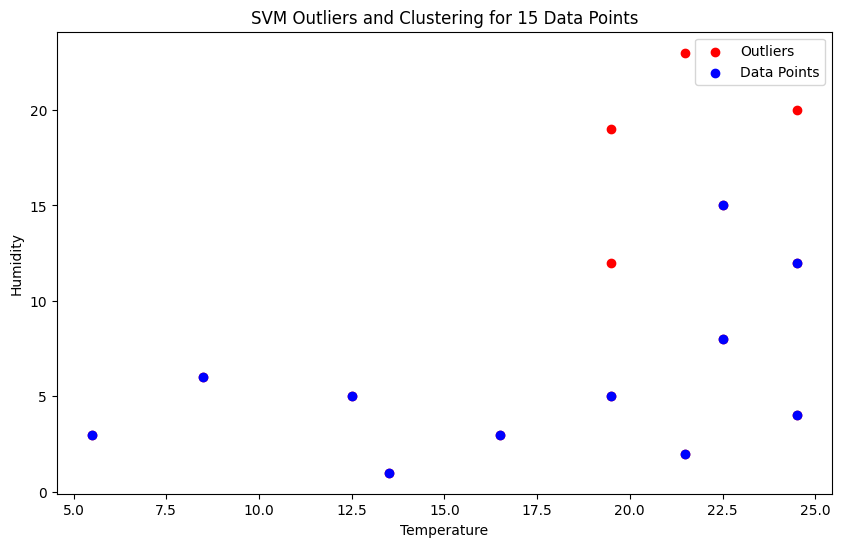

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


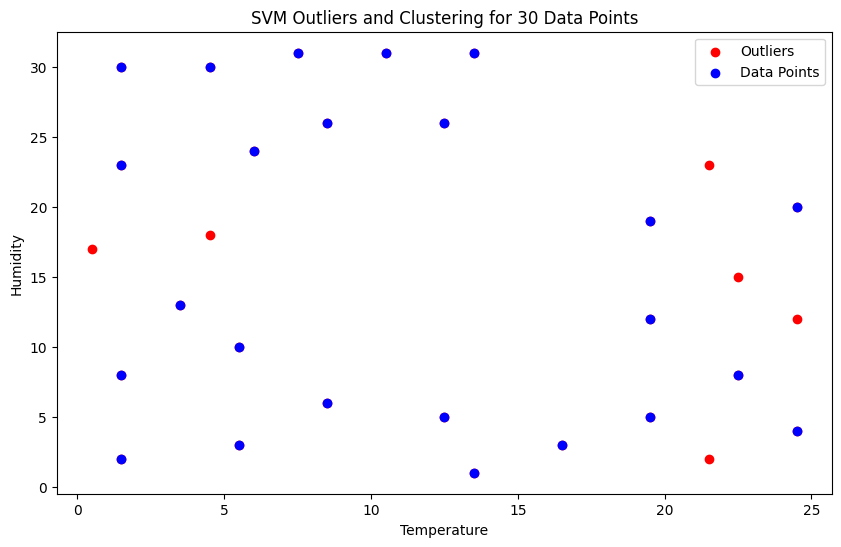

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


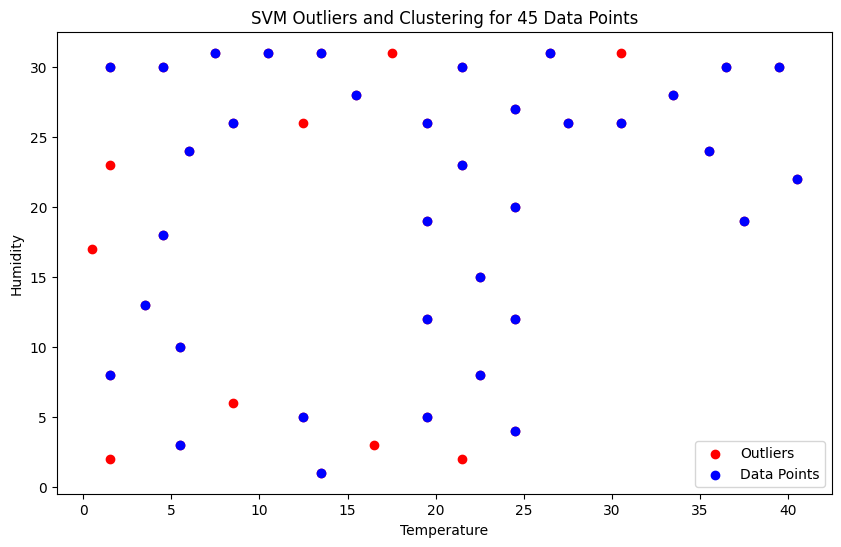

({'Subset Size': 15,
  'Outliers index': [3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14],
  'Number of Outliers': 11,
  'Silhouette Score': 0.45755285455366707,
  'Davies-Bouldin Index': 0.7289658742633861},
 {'Subset Size': 30,
  'Outliers index': [1,
   2,
   5,
   6,
   7,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29],
  'Number of Outliers': 24,
  'Silhouette Score': 0.4313835567436002,
  'Davies-Bouldin Index': 0.851842831046307},
 {'Subset Size': 45,
  'Outliers index': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   9,
   11,
   12,
   14,
   16,
   17,
   18,
   20,
   22,
   23,
   24,
   25,
   26,
   27,
   29,
   30,
   32,
   33,
   34,
   35,
   36,
   38,
   39,
   40,
   41,
   42,
   43,
   44],
  'Number of Outliers': 36,
  'Silhouette Score': 0.39640187418389655,
  'Davies-Bouldin Index': 0.997199465309824})

In [5]:
# Data provided by the user
data = np.array([
    [21.5, 23],
    [24.5, 20],
    [19.5, 19],
    [22.5, 15],
    [24.5, 12],
    [19.5, 12],
    [22.5, 8],
    [24.5, 4],
    [21.5, 2],
    [19.5, 5],
    [16.5, 3],
    [13.5, 1],
    [12.5, 5],
    [8.5, 6],
    [5.5, 3],
    [1.5, 2],
    [1.5, 8],
    [5.5, 10],
    [3.5, 13],
    [0.5, 17],
    [4.5, 18],
    [1.5, 23],
    [6, 24],
    [1.5, 30],
    [4.5, 30],
    [7.5, 31],
    [8.5, 26],
    [10.5, 31],
    [12.5, 26],
    [13.5, 31],
    [15.5, 28],
    [17.5, 31],
    [19.5, 26],
    [21.5, 30],
    [24.5, 27],
    [26.5, 31],
    [27.5, 26],
    [30.5, 31],
    [30.5, 26],
    [33.5, 28],
    [36.5, 30],
    [39.5, 30],
    [35.5, 24],
    [40.5, 22],
    [37.5, 19],
    [34.5, 16],
    [39.5, 14],
    [35.5, 10],
    [39.5, 6],
    [38.5, 1],
    [35.5, 4],
    [31.5, 6],
    [28.5, 5],
    [26.5, 2]
])

# Modified function to perform One-Class SVM outlier detection and count outliers
import numpy as np
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


# Modified function to perform One-Class SVM outlier detection and clustering
def svm_outlier_detection_and_clustering(data_subset):
    # Initialize One-Class SVM
    svm = OneClassSVM(nu=0.05, kernel="rbf", gamma='auto')
    svm.fit(data_subset)

    # Predict outliers (returns -1 for outliers and 1 for inliers)
    predictions = svm.predict(data_subset)
    outliers_subset = np.where(predictions == -1)[0]
    num_outliers = len(outliers_subset)

    # Clustering (assuming 2 clusters for demonstration)
    kmeans = KMeans(n_clusters=2)
    labels = kmeans.fit_predict(data_subset)

    # Calculate silhouette score and Davies-Bouldin index
    silhouette_avg = silhouette_score(data_subset, labels)
    db_index = davies_bouldin_score(data_subset, labels)

    # Plotting the subset data and highlighting the outliers
    plt.figure(figsize=(10, 6))
    plt.scatter(data_subset[:, 0], data_subset[:, 1],  color='red', label='Outliers')
    plt.scatter(data_subset[outliers_subset, 0], data_subset[outliers_subset, 1], color='blue', label='Data Points')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.title(f'SVM Outliers and Clustering for {len(data_subset)} Data Points')
    plt.legend()
    plt.show()

    # Returning results
    return {
        'Subset Size': len(data_subset),
        'Outliers index': outliers_subset.tolist(),
        'Number of Outliers': num_outliers,
        'Silhouette Score': silhouette_avg,
        'Davies-Bouldin Index': db_index
    }

# Perform SVM outlier detection and clustering on different subsets
results_15 = svm_outlier_detection_and_clustering(data[:15, :])
results_30 = svm_outlier_detection_and_clustering(data[:30, :])
results_45 = svm_outlier_detection_and_clustering(data[:45, :])

# Displaying results for each subset
results_15, results_30, results_45



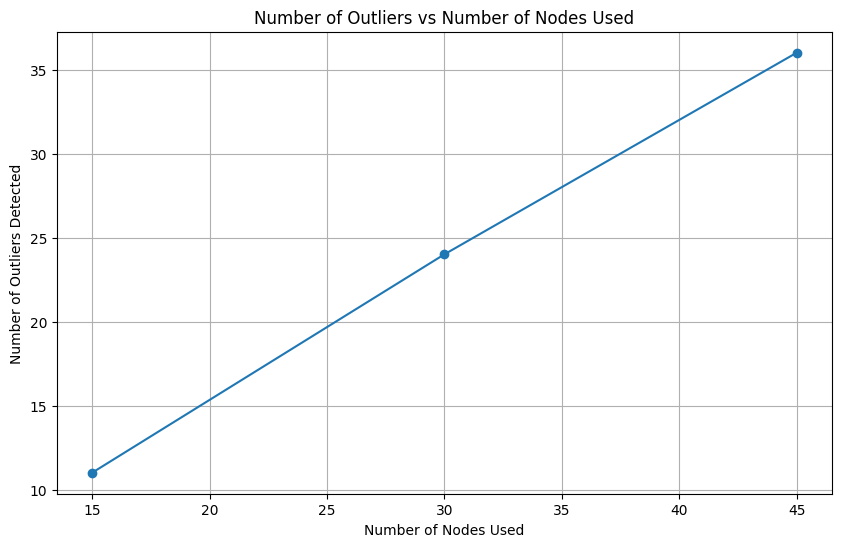

In [ ]:
import matplotlib.pyplot as plt

# Number of nodes used in each subset
nodes_used = [15, 30, 45]

# Number of outliers detected in each subset
# Assuming results_15, results_30, results_45 are dictionaries returned from svm_outlier_detection function
num_outliers_detected = [
    results_15['Number of Outliers'],
    results_30['Number of Outliers'],
    results_45['Number of Outliers']
]

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(nodes_used, num_outliers_detected, marker='o')
plt.xlabel('Number of Nodes Used')
plt.ylabel('Number of Outliers Detected')
plt.title('Number of Outliers vs Number of Nodes Used')
plt.grid(True)
plt.show()


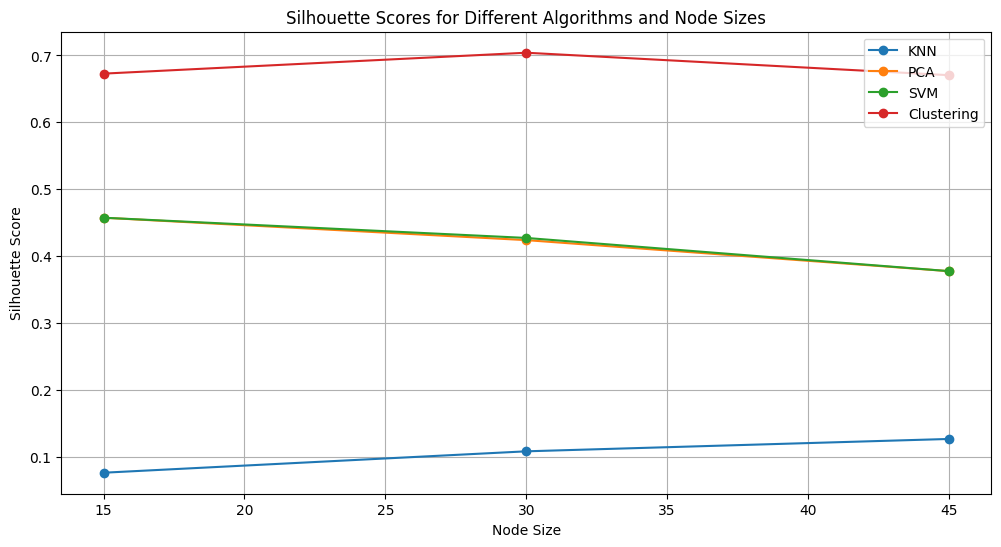

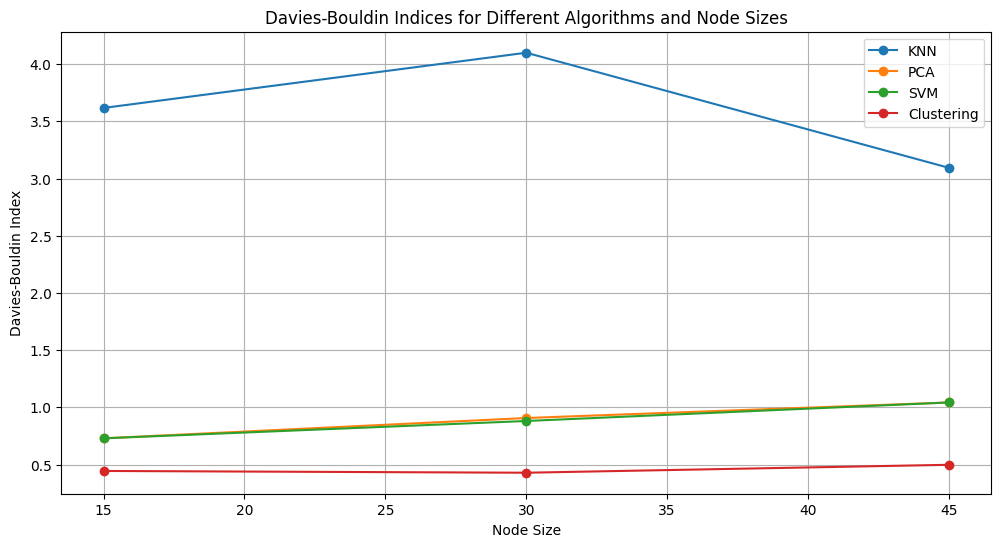

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each algorithm and each metric

# KNN
knn_nodes = [15, 30, 45]
knn_silhouette = [0.07658347083898809, 0.10855484053631671, 0.12703168267881937]
knn_davies = [3.616834607797349, 4.099491622668832, 3.093089740475385]

# PCA
pca_nodes = [15, 30, 45]
pca_silhouette = [0.45755285455366707, 0.42407913409821185, 0.3777254359506918]
pca_davies = [0.728965874263386, 0.90647445250346, 1.0423149414566129]

# SVM
svm_nodes = [15, 30, 45]
svm_silhouette = [0.45755285455366707, 0.42734773111593854, 0.3777254359506917]
svm_davies = [0.7289658742633861, 0.8803763705688382, 1.0423149414566129]

# Clustering (DBSCAN)
clustering_nodes = [15, 30, 45]
clustering_silhouette = [0.6728173790163573, 0.704054129301148, 0.6704917874515709]
clustering_davies = [0.44360653158736923, 0.4281957930254096, 0.49753140222769454]

# Plotting Silhouette Scores
plt.figure(figsize=(12, 6))

plt.plot(knn_nodes, knn_silhouette, marker='o', label='KNN')
plt.plot(pca_nodes, pca_silhouette, marker='o', label='PCA')
plt.plot(svm_nodes, svm_silhouette, marker='o', label='SVM')
plt.plot(clustering_nodes, clustering_silhouette, marker='o', label='Clustering')

plt.title('Silhouette Scores for Different Algorithms and Node Sizes')
plt.xlabel('Node Size')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Davies-Bouldin Indices
plt.figure(figsize=(12, 6))

plt.plot(knn_nodes, knn_davies, marker='o', label='KNN')
plt.plot(pca_nodes, pca_davies, marker='o', label='PCA')
plt.plot(svm_nodes, svm_davies, marker='o', label='SVM')
plt.plot(clustering_nodes, clustering_davies, marker='o', label='Clustering')

plt.title('Davies-Bouldin Indices for Different Algorithms and Node Sizes')
plt.xlabel('Node Size')
plt.ylabel('Davies-Bouldin Index')
plt.legend()
plt.grid(True)
plt.show()
